# 0.0 IMPORTS

In [27]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image


## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_raw_sale = pd.read_csv('data/train.csv', low_memory = False)
df_raw_store = pd.read_csv('data/store.csv',low_memory = False)

In [3]:
df_raw = pd.merge(df_raw_sale,df_raw_store, how='left',on='Store')

# 1.0 PASSO 01 - DESCRIÇÃO DOS DADOS

In [4]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
old_columns = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 
               'Assortment',     'CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
               'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snake_case = lambda x : inflection.underscore(x)

new_columns = list(map(snake_case,old_columns))

#Rename Columns
df1.columns = new_columns


## 1.2 Data Dimensions

In [7]:
df1.shape

(1017209, 18)

In [8]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Data Types

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
#date to datetime

df1['date'] =pd.to_datetime(df1['date'])

In [11]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA


In [13]:
df1['competition_distance'].max()

75860.0

In [14]:
#competition_distance   
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)

#competition_open_since_month    

df1['competition_open_since_month'] = df1.apply(lambda x : x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)

#competition_open_since_year     
df1['competition_open_since_year'] = df1.apply(lambda x : x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)
                       
#promo2_since_week    
df1['promo2_since_week'] = df1.apply(lambda x : x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)

#promo2_since_year               
df1['promo2_since_year'] = df1.apply(lambda x : x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'],axis=1)

#promo_interval                  
df1['promo_interval'].fillna(0,inplace=True)
    
    #aproveitando essa informacao para saber se esses meses com promoção2 influenciaram no aumento das vendas

dic_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df1['month_of_date'] = df1['date'].dt.month.map(dic_month)

df1['is_promo2'] = df1[['promo_interval','month_of_date']].apply(lambda x : 0 if x['promo_interval'] == 0 else 1 if x['month_of_date'] in x['promo_interval'].split(',') else 0, axis =1)

## 1.6 Change Types

In [15]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical

In [16]:
num_attributes = df1.select_dtypes(include=['int64','float64'])

In [17]:
num_attributes.columns

Index(['store', 'day_of_week', 'sales', 'customers', 'open', 'promo',
       'school_holiday', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo2'],
      dtype='object')

In [18]:
cat_attributes = df1.select_dtypes(exclude=['int64','float64'])

In [19]:
cat_attributes.columns

Index(['date', 'state_holiday', 'store_type', 'assortment', 'promo_interval',
       'month_of_date'],
      dtype='object')

### 1.7.1 Numerical Attributes

In [20]:
#Métricas de Tendência Central

tc1 = pd.DataFrame(num_attributes.mean())
tc2 = pd.DataFrame(num_attributes.median())

#Métricas de Dispersão

dp1 = pd.DataFrame(num_attributes.std())
dp2 = pd.DataFrame(num_attributes.min())
dp3 = pd.DataFrame(num_attributes.max())
dp4 = pd.DataFrame(num_attributes.skew())
dp5 = pd.DataFrame(num_attributes.kurtosis())
dp6 = pd.DataFrame(num_attributes.apply(lambda x: x.max()- x.min()))



In [21]:
#Unindo as métricas
m = pd.concat([tc1,tc2,dp2,dp3,dp6,dp1,dp4,dp5],axis=1,sort='True').reset_index()
m.columns = ['attributes','media','media','min','max','range','std','skew','kurtosis']

In [22]:
m

,attributes,media,media,min,max,range,std,skew,kurtosis
0,competition_distance,5935.442677,2330.0,20.0,200000.0,199980.0,12547.652996,10.242344,147.789712
1,competition_open_since_month,6.786849,7.0,1.0,12.0,11.0,3.311087,-0.042076,-1.232607
2,competition_open_since_year,2010.324840,2012.0,1900.0,2015.0,115.0,5.515593,-7.235657,124.071304
3,customers,633.145946,609.0,0.0,7388.0,7388.0,464.411734,1.598650,7.091773
4,day_of_week,3.998341,4.0,1.0,7.0,6.0,1.997391,0.001593,-1.246873
5,is_promo2,0.171835,0.0,0.0,1.0,1.0,0.377237,1.739838,1.027039
6,open,0.830107,1.0,0.0,1.0,1.0,0.375539,-1.758045,1.090723
7,promo,0.381515,0.0,0.0,1.0,1.0,0.485759,0.487838,-1.762018
8,promo2,0.500564,1.0,0.0,1.0,1.0,0.500000,-0.002255,-1.999999
9,promo2_since_week,23.619033,22.0,1.0,52.0,51.0,14.310064,0.178723,-1.184046


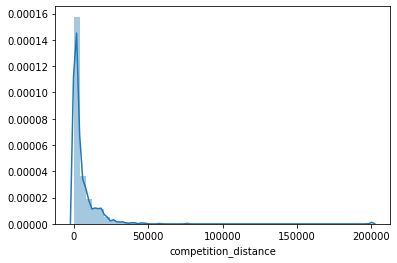

In [23]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

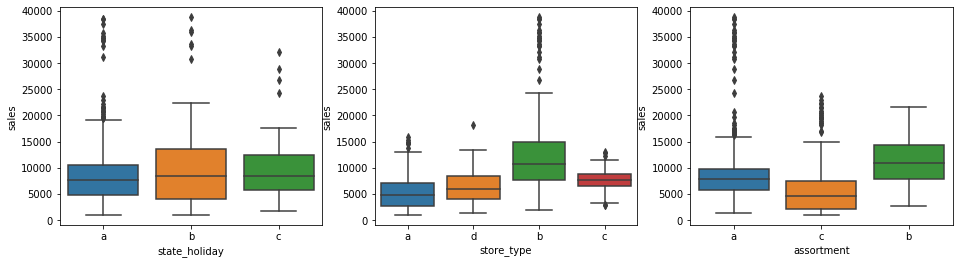

In [24]:
plt.figure(figsize=(16,4))
aux_plot = df1.loc[(df1['state_holiday']!='0') & (df1['sales']>0) ]


#filter in state_holiday to plot

plt.subplot(1,3,1)
sns.boxplot( x = "state_holiday", y ="sales",data = aux_plot)


#filter in store_type to plot
plt.subplot(1,3,2)
sns.boxplot( x = "store_type", y ="sales",data = aux_plot)


#filter in assortment to plot
plt.subplot(1,3,3)
sns.boxplot( x = "assortment", y ="sales",data = aux_plot)




In [25]:
df1.loc[df1['competition_distance']==200000].sample(5).T

,189840,793716,881801,918265,914393
store,291,622,622,291,879
day_of_week,3,6,4,6,3
date,2015-02-11 00:00:00,2013-07-20 00:00:00,2013-05-02 00:00:00,2013-03-30 00:00:00,2013-04-03 00:00:00
sales,6521,2774,5651,8718,2485
customers,710,298,576,965,265
open,1,1,1,1,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,1,0,0,0,1
store_type,d,a,a,d,d


# 2.0 PASSO 02 - FEATURE ENGINEERING

In [83]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipóteses

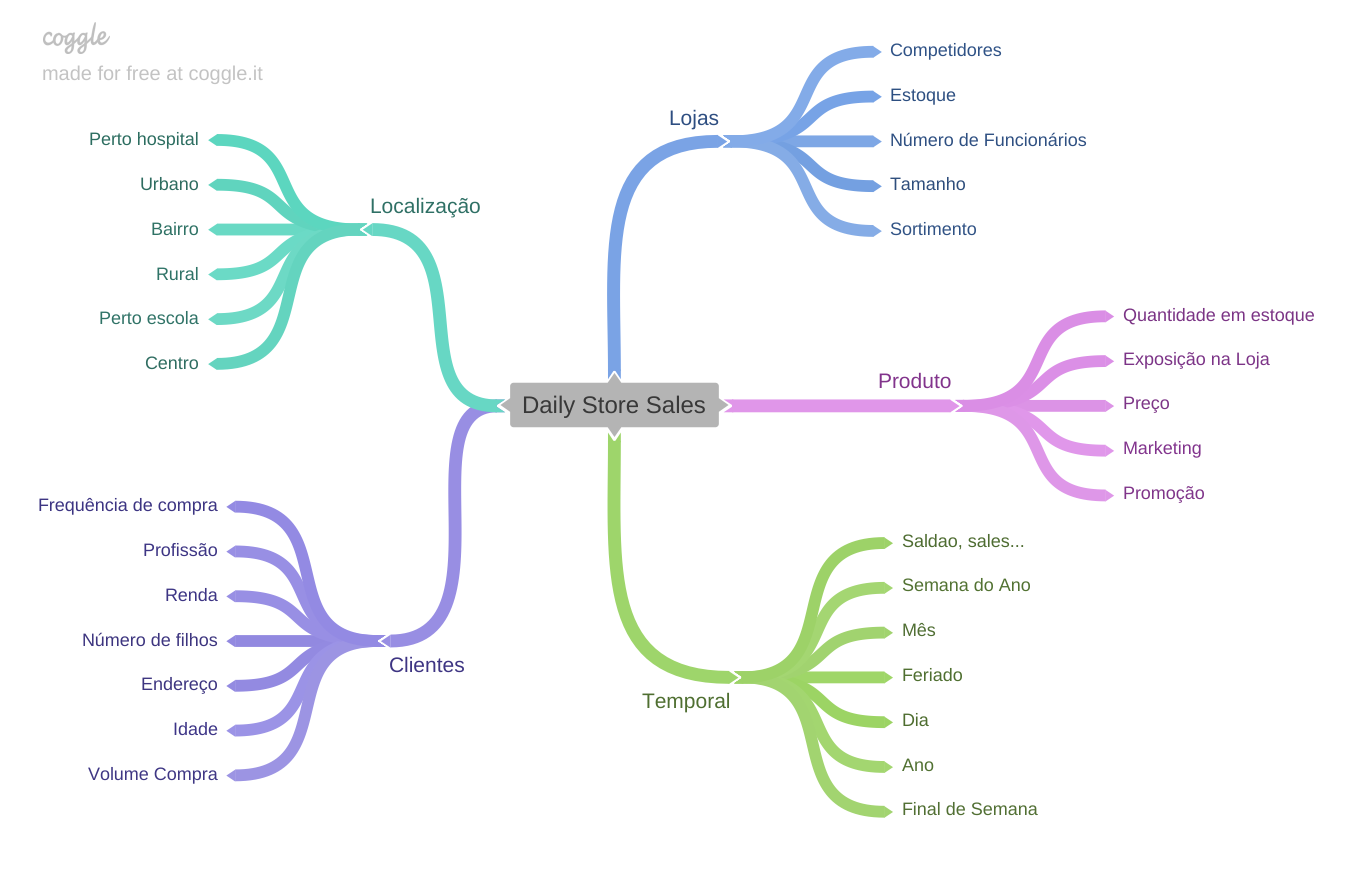

In [30]:
Image(filename='img/mm_hip.png') 

## 2.2 Criação das Hipóteses

**2.2.1.** Hipóteses Lojas

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

**2.2.2.** Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**2.2.3.** Hipóteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares

## 2.3 Lista final de Hipóteses

**1.**   Lojas com maior sortimentos deveriam vender mais.
  
**2.**   Lojas com competidores mais próximos deveriam vender menos.
  
**3.**   Lojas com competidores à mais tempo deveriam vendem mais.
  
**4.**   Lojas com promoções ativas por mais tempo deveriam vender mais
  
**5.**   Lojas com mais dias de promoção deveriam vender mais.
  
**6.**   Lojas com mais promoções consecutivas deveriam vender mais.
  
**7.**   Lojas abertas durante o feriado de Natal deveriam vender mais.
  
**8.**   Lojas deveriam vender mais ao longo dos anos.
  
**9.**   Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.


## 2.4 Feature Engineering

In [94]:
#year
df2['year']=df2['date'].dt.year

#month
df2['month']=df2['date'].dt.month

week
df2['day']=df2['date'].dt.day

#week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].apply(lambda x: x.strftime('%Y-%W'))

#competition since (unidade: mês)
df2['competition_since'] = df2['competition_open_since_year'].astype(str) + '-'+ df2['competition_open_since_month'].astype(str)+'-1'
df2['competition_since'] = df2['competition_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') )
df2['competition_time_month'] = ((df2['date']-df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

##promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-'+ df2['promo2_since_week'].astype(str)+'-1'
df2['promo_since'] = (df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%W-%w'))) - datetime.timedelta(days=7)
df2['promo_time_week'] = ((df2['date']-df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x =='b' else 'extended')

#state holiday

df2['state_holiday'] = df2['state_holiday'].apply(lambda x:'public_holiday' if x=='a' else 
                                                  'easter_holiday' if x=='b' else 'christmas' if x=='c' else 'regular_day')


# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [108]:
df3 = df2.copy()

In [105]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_of_date', 'is_promo2',
       'year', 'month', 'day', 'week_of_year', 'year_week',
       'competition_since', 'competition_time_month', 'promo_since',
       'promo_time_week'],
      dtype='object')

## 3.1 Filtragem de linhas

In [109]:
df3 = df3[(df3['sales']>0) & (df3['open']!=0)]


In [116]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_of_date', 'is_promo2',
       'year', 'month', 'day', 'week_of_year', 'year_week',
       'competition_since', 'competition_time_month', 'promo_since',
       'promo_time_week'],
      dtype='object')

## 3.1 Seleção de colunas

In [119]:
cols_drop = ['customers','open','month_of_date','promo_interval']
df3 = df3.drop(cols_drop,axis=1)

In [120]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo2', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 0.0 IMPORTS

In [ ]:
# 0.0 IMPORTS